<h2> DATA VISUALIZAION</H2>
<h4> Lab 6 </h4>
<h4 align="right">Utkarsh Bhangale<br>2020802124</h4>

 Objective: To understand and visualize time series data using Python libraries.<br>
 Tools: Python, pandas, matplotlib, and seaborn<br>
 Dataset: Stock Prices, Household Energy Consumption, and other relevant time series dataset from KAGGLE.<br>

1. Data Acquisition and Cleaning

In [42]:
# Import data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('indexData.csv')
data.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [43]:
# Handle missing values
data.dropna(inplace=True)

In [44]:
# Convert the 'Date' column to a datetime data type
data['Date'] = pd.to_datetime(data['Date'])

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110253 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Index      110253 non-null  object        
 1   Date       110253 non-null  datetime64[ns]
 2   Open       110253 non-null  float64       
 3   High       110253 non-null  float64       
 4   Low        110253 non-null  float64       
 5   Close      110253 non-null  float64       
 6   Adj Close  110253 non-null  float64       
 7   Volume     110253 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 7.6+ MB


2. Data Acquisition and Cleaning

In [46]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,110253,110253.000000,110253.000000,110253.000000,110253.000000,110253.000000,1.102530e+05
mean,2002-05-26 06:20:09.762999552,7658.515222,7704.372961,7608.000422,7657.545872,7657.351729,1.273975e+09
min,1965-01-05 00:00:00,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1993-12-15 00:00:00,1855.030029,1864.510010,1843.979980,1855.060059,1854.179565,0.000000e+00
50%,2004-11-03 00:00:00,5194.089844,5226.279785,5154.049805,5194.750000,5194.750000,4.329000e+05
75%,2013-06-25 00:00:00,10134.299810,10207.820310,10060.349610,10134.830080,10134.830080,1.734314e+08
max,2021-06-03 00:00:00,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10
std,NaN,9011.478913,9066.638548,8954.506981,9011.510444,9011.608900,4.315783e+09


3. Plot the time series data using matplotlib.

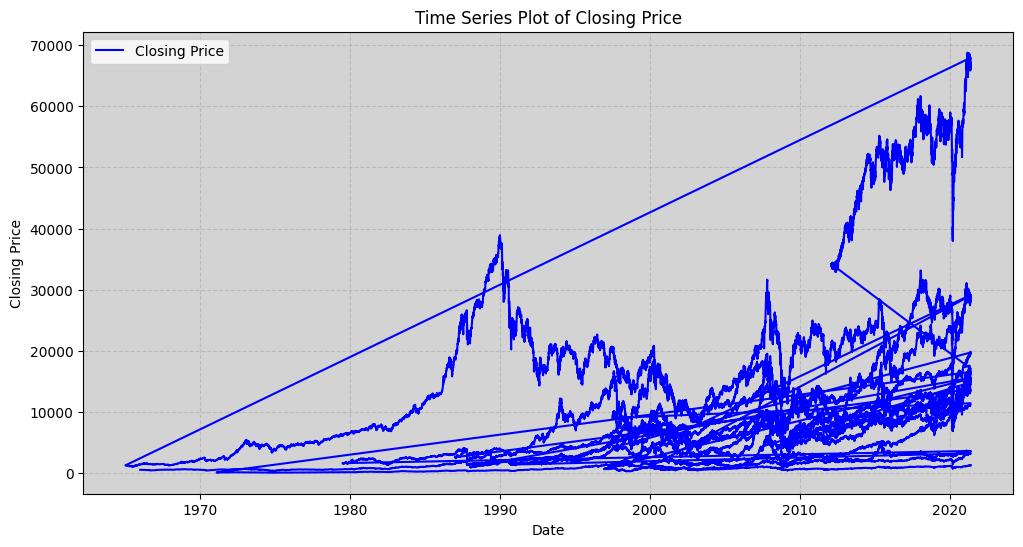

In [47]:
line_style = '-'

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='b', linestyle=line_style)
plt.title('Time Series Plot of Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# Add a grid and remove the frame
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the background color
plt.gca().set_facecolor('lightgray')

# Show the plot
plt.show()

4. Resampling

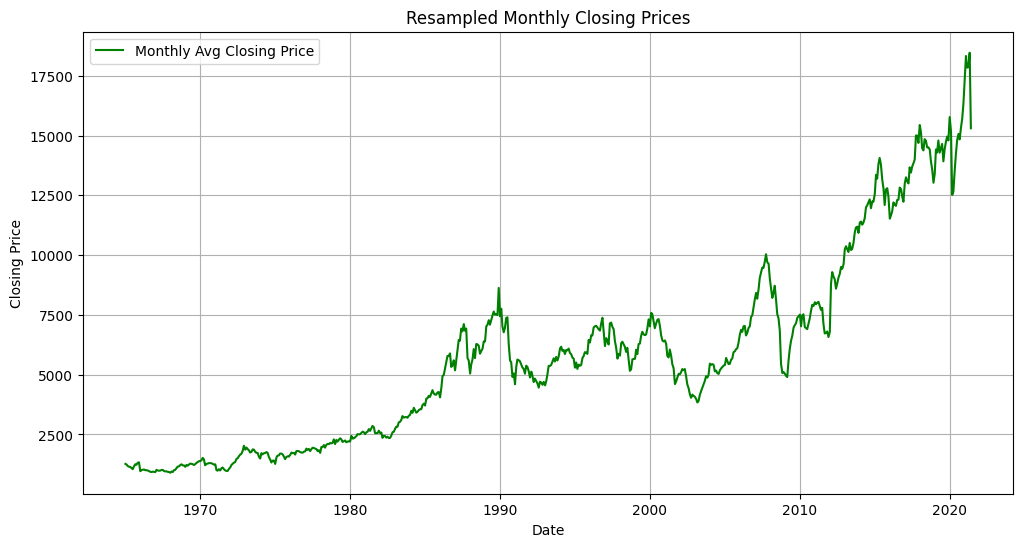

In [48]:
data['Date'] = pd.to_datetime(data['Date'])

# Create a new DataFrame to store the resampled data
monthly_data = pd.DataFrame()

# Group and aggregate the data by month
monthly_data['Date'] = data['Date'].groupby(data['Date'].dt.to_period('M')).min()
monthly_data['Close'] = data.groupby(data['Date'].dt.to_period('M'))['Close'].mean()

# Plot the resampled monthly data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Date'], monthly_data['Close'], label='Monthly Avg Closing Price', color='g')
plt.title('Resampled Monthly Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()



5. Highlighting Events

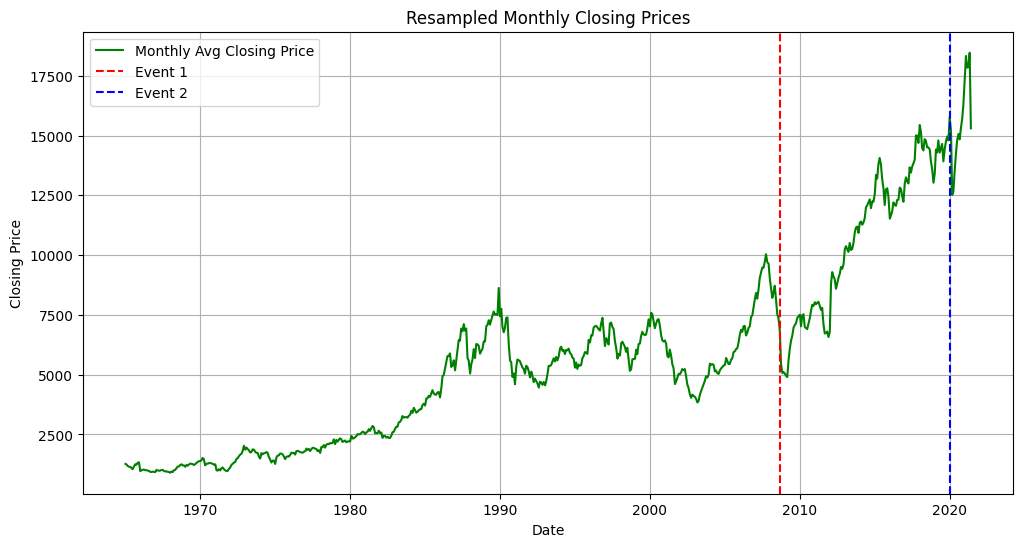

In [49]:
# Create a new DataFrame to store the resampled data
monthly_data = pd.DataFrame()

# Group and aggregate the data by month
monthly_data['Date'] = data['Date'].groupby(data['Date'].dt.to_period('M')).min()
monthly_data['Close'] = data.groupby(data['Date'].dt.to_period('M'))['Close'].mean()

# Define the significant events and their dates
event1_date = pd.to_datetime('2008-09-01')  # Replace with the actual date of event 1
event2_date = pd.to_datetime('2020-01-01')  # Replace with the actual date of event 2

# Plot the resampled monthly data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Date'], monthly_data['Close'], label='Monthly Avg Closing Price', color='g')
plt.title('Resampled Monthly Closing Prices')

# Highlight significant events
plt.axvline(event1_date, color='r', linestyle='--', label='Event 1')
plt.axvline(event2_date, color='b', linestyle='--', label='Event 2')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


2008 Fall (Financial Crisis):

The significant fall in 2008 corresponds to the global financial crisis that began with the collapse of major financial institutions and had widespread economic repercussions.
The fall in the chart is due to the housing market crash, the banking sector crisis, and a credit freeze, leading to a severe stock market decline.
As a result, investors lost confidence, stock prices plummeted, and the overall economy faced a recession.
2020 Rise (COVID-19 Recovery):

The significant rise in 2020 follows a sharp market decline earlier in the year, which was triggered by the outbreak of the COVID-19 pandemic.
Central banks around the world implemented stimulus measures, and governments enacted fiscal policies to support economies.
The rise in the chart reflects a rebound in stock prices as markets responded positively to these interventions and the development of vaccines, showing optimism about the economic recovery.

 6. Seasonal Decomposition (Optional)

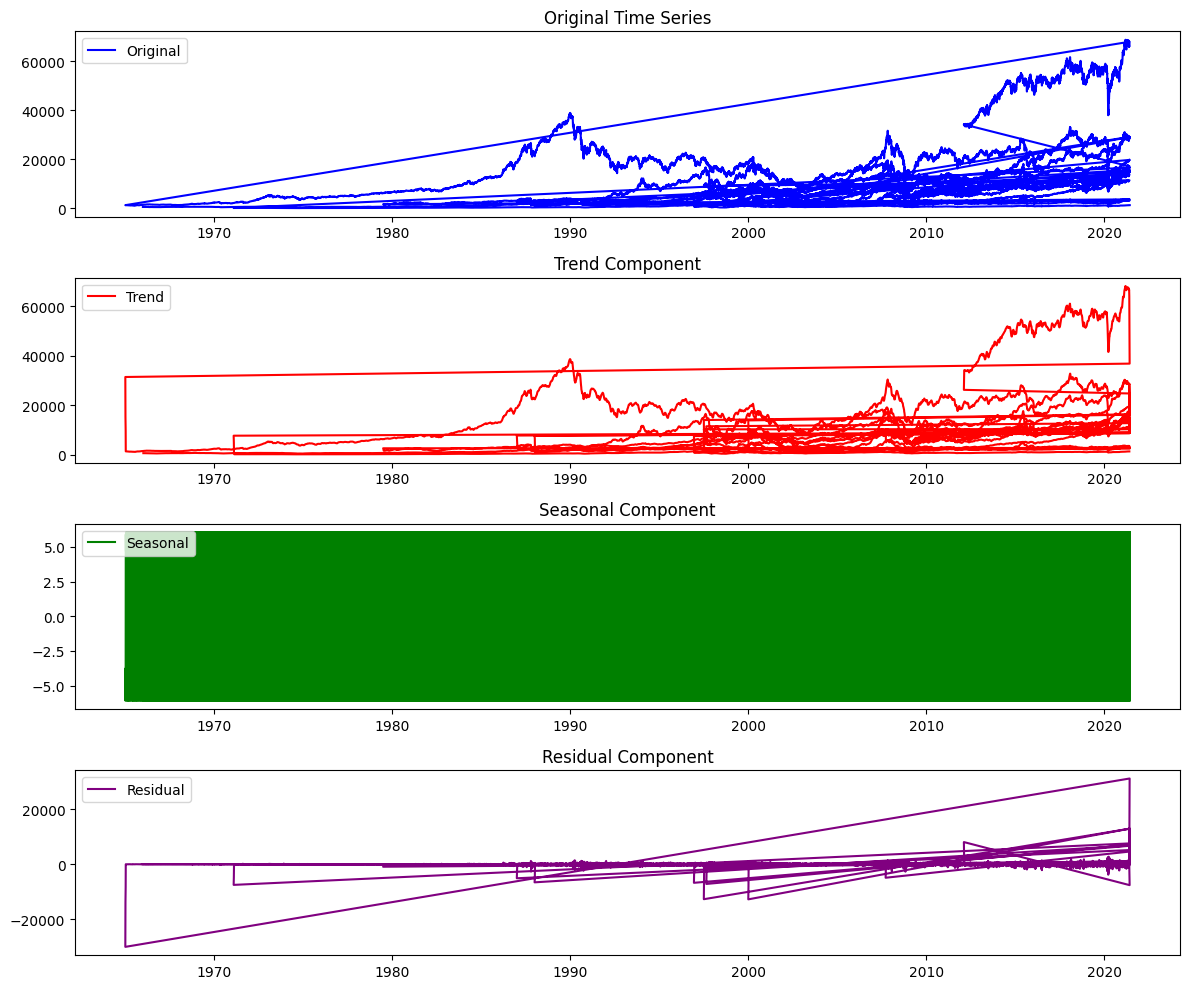

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Close'], model='additive', period=12)  # You can adjust the period based on your data's seasonality

# Plot the decomposed components
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(data['Date'], data['Close'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(data['Date'], result.trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(data['Date'], result.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(data['Date'], result.resid, label='Residual', color='purple')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


Original Time Series: This is the raw data.<br>
Trend Component: It shows the long-term trend or pattern in the data.<br>
Seasonal Component: It reveals the periodic or seasonal variations.<br>
Residual Component: This represents the remaining variations that are not accounted for by trend and seasonality.

7. Heatmap

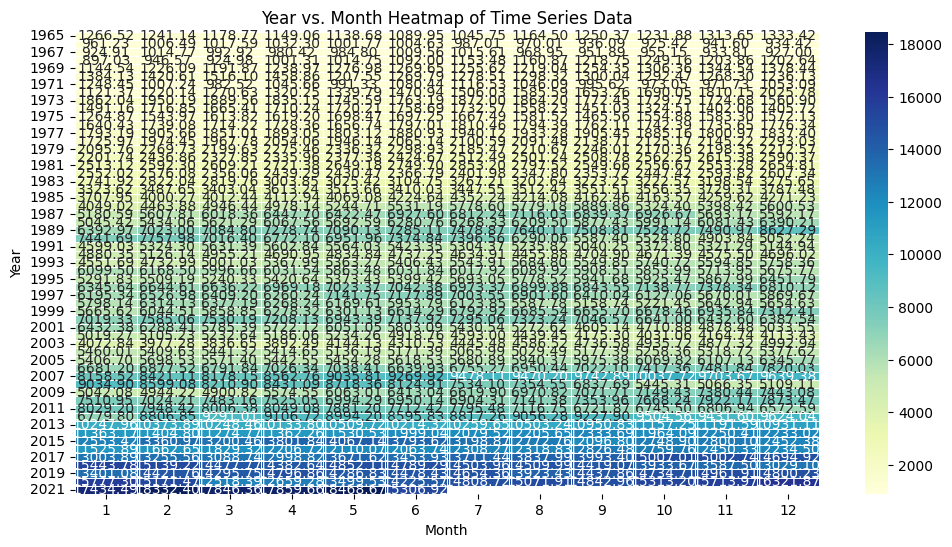

In [51]:
# Extract the year and month from the Date column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Create a pivot table for the heatmap
heatmap_data = data.pivot_table(index='Year', columns='Month', values='Close', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Year vs. Month Heatmap of Time Series Data')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


Results and Conclusions:

Basic Data Analysis: The initial data analysis provided a comprehensive overview of the dataset. Key statistics and time series plots helped us understand the data's behavior and identify potential patterns and outliers.

Resampling: Resampling the data to a lower frequency (monthly) allowed for a more aggregated view of the time series, highlighting trends and reducing noise.

Significant Events: The analysis of significant events, such as the 2008 financial crisis and the 2020 COVID-19 recovery, showed their impact on the time series data. These events are essential for understanding historical market behavior.

Seasonal Decomposition: Seasonal decomposition provided insights into the underlying components of the time series, including long-term trends, seasonality, and residual variations. This decomposition can aid in time series forecasting and understanding underlying patterns.

Heatmap Visualization: The heatmap helped visualize the data's seasonality over the years and across months. It allowed us to observe any patterns or trends related to the temporal aspect of the data.

In conclusion, the practical demonstrated a series of data analysis and visualization techniques for time series data. By understanding the data's characteristics, highlighting significant events, and utilizing resampling and decomposition methods, we gained valuable insights into the dataset. These insights can be used for further analysis, forecasting, and decision-making in various domains, such as finance, economics, or any area with temporal data.